In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#from google.colab import drive
#drive.mount('/content/drive')
#baseUrl = '/content/drive/Shared drives/Analitica Predictiva/covid-19-flr-analitica-predictiva'
#os.chdir(baseUrl)

In [3]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.linear_model import SGDRegressor, Lasso, Ridge
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error

## Modelo Medellin Corto Plazo

In [4]:
urlDatasetMED = 'Datos/data_Medellin.pickle'
dfMED = pd.read_pickle(urlDatasetMED)
dfMED.tail(20)

,dias,semana,infectados,recuperados,muertos,acumulado_infectados,acumulado_recuperados,acumulado_muertos,activos
fecha_infeccioso,,,,,,,,,
2020-08-13,166,23,829.0,1075.0,18.0,42425.0,15497.0,657.0,26271.0
2020-08-14,167,23,827.0,1028.0,22.0,43252.0,16525.0,679.0,26048.0
2020-08-15,168,24,716.0,1543.0,36.0,43968.0,18068.0,715.0,25185.0
2020-08-16,169,24,734.0,1454.0,20.0,44702.0,19522.0,735.0,24445.0
2020-08-17,170,24,640.0,1578.0,19.0,45342.0,21100.0,754.0,23488.0
2020-08-18,171,24,515.0,1095.0,21.0,45857.0,22195.0,775.0,22887.0
2020-08-19,172,24,354.0,1728.0,21.0,46211.0,23923.0,796.0,21492.0
2020-08-20,173,24,369.0,1512.0,20.0,46580.0,25435.0,816.0,20329.0
2020-08-21,174,24,330.0,1050.0,25.0,46910.0,26485.0,841.0,19584.0


### Activos

In [5]:
#Split data
X = dfMED['dias'].values.reshape(-1,1)
y = dfMED['activos'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)
#Train Model.
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=5),Lasso(random_state=123))
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=123, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [6]:
#Run predictions based on test data.
y_pred = pipe.predict(X_test)
#Run predictions over future days data.
x_pred_future = np.arange(175,200,step=1)
y_pred_future = pipe.predict(x_pred_future.reshape(-1,1))

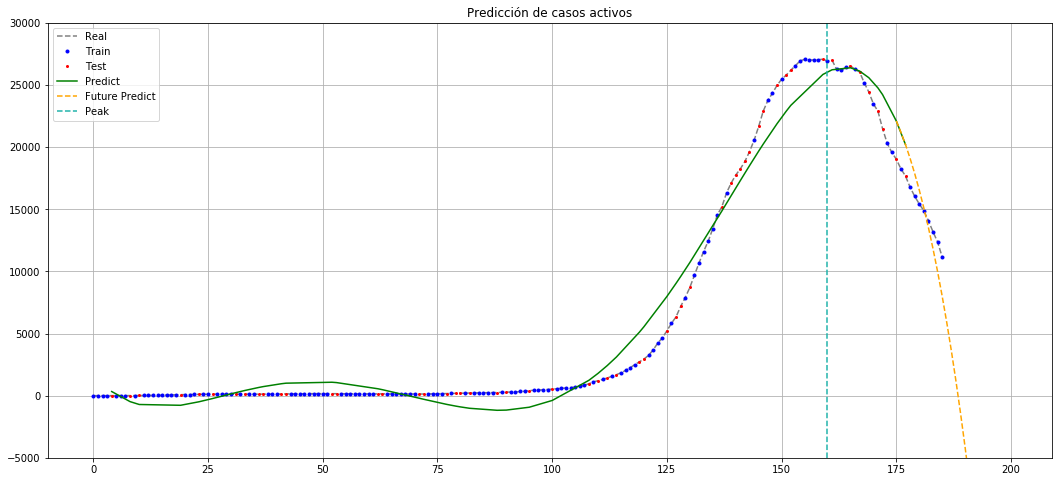

In [7]:
#Graph ordered data.
f = plt.figure(figsize=(18,8))
plt.title('Predicción de casos activos')
plt.grid()
plt.plot(X,y,'--',color='gray',label='Real',)
plt.plot(X_train[X_train.flatten().argsort(),0],y_train[X_train.flatten().argsort(),0],'ob',markersize=3,label='Train')
plt.plot(X_test[X_test.flatten().argsort(),0],y_test[X_test.flatten().argsort(),0],'or',markersize=2,label='Test')
plt.plot(X_test[X_test.flatten().argsort(),0],y_pred[X_test.flatten().argsort()],'-g',label='Predict')
plt.plot(x_pred_future,y_pred_future,'--',color='orange',label='Future Predict')
plt.plot([160,160],[-5000,30000],'--',color='lightseagreen', label='Peak') #Peak of cases.
plt.ylim(-5000,30000)
plt.legend(loc='upper left');

In [8]:
#Calculate Metrics of trained model
x_val = X[160:]
y_val = y[160:]
y_pred_val = pipe.predict(x_val)
print('     ---- Métricas ----')
print('Total RMSE:\t\t{:.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Total MAE:\t\t{:.0f}'.format(mean_absolute_error(y_test,y_pred)))
print('After Peak RMSE:\t{:.0f}'.format(np.sqrt(mean_squared_error(y_val, y_pred_val))))
print('After Peak MAE:\t\t{:.0f}'.format(mean_absolute_error(y_val,y_pred_val)))

     ---- Métricas ----
Total RMSE:		1530
Total MAE:		1248
After Peak RMSE:	1876
After Peak MAE:		1481


### Recuperados

In [9]:
#Split data.
X = dfMED['dias'].values.reshape(-1,1)
y = dfMED['acumulado_recuperados'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)

pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=5),Lasso(random_state=123))
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=123, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [10]:
y_pred = pipe.predict(X_test)
x_pred_future = np.arange(175,200,step=1)
y_pred_future = pipe.predict(x_pred_future.reshape(-1,1))

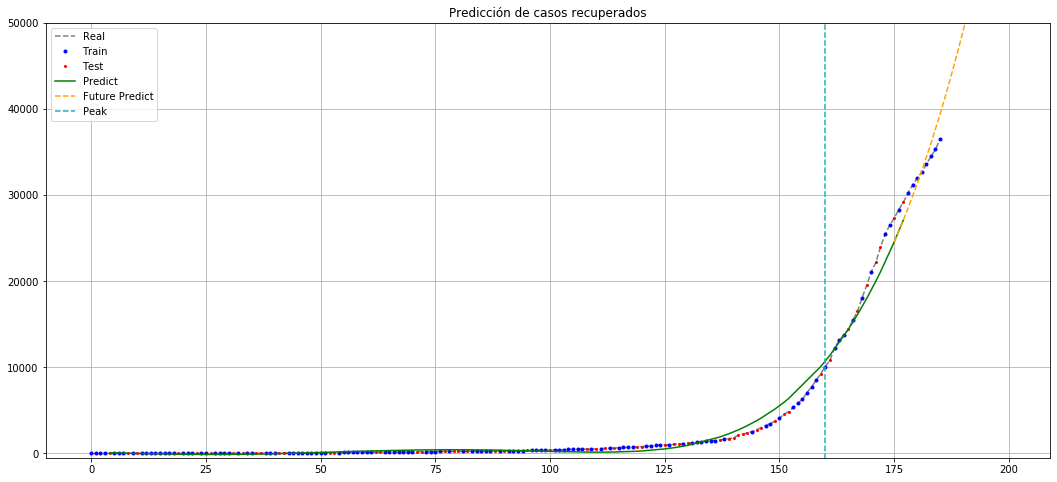

In [11]:
#Graph ordered data.
f = plt.figure(figsize=(18,8))
plt.title('Predicción de casos recuperados')
plt.grid()
plt.plot(X,y,'--',color='gray',label='Real',)
plt.plot(X_train[X_train.flatten().argsort(),0],y_train[X_train.flatten().argsort(),0],'ob',markersize=3,label='Train')
plt.plot(X_test[X_test.flatten().argsort(),0],y_test[X_test.flatten().argsort(),0],'or',markersize=2,label='Test')
plt.plot(X_test[X_test.flatten().argsort(),0],y_pred[X_test.flatten().argsort()],'-g',label='Predict')
plt.plot(x_pred_future,y_pred_future,'--',color='orange',label='Future Predict')
plt.plot([160,160],[-5000,50000],'--',color='lightseagreen', label='Peak') #Peak of cases.
plt.ylim(-500,50000)
plt.legend(loc='upper left');

In [12]:
#Calculate Metrics of trained model
x_val = X[160:]
y_val = y[160:]
y_pred_val = pipe.predict(x_val)
print('     ---- Métricas ----')
print('Total RMSE:\t\t{:.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Total MAE:\t\t{:.0f}'.format(mean_absolute_error(y_test,y_pred)))
print('After Peak RMSE:\t{:.0f}'.format(np.sqrt(mean_squared_error(y_val, y_pred_val))))
print('After Peak MAE:\t\t{:.0f}'.format(mean_absolute_error(y_val,y_pred_val)))

     ---- Métricas ----
Total RMSE:		862
Total MAE:		548
After Peak RMSE:	1782
After Peak MAE:		1435


### Muertes

In [13]:
#Split data.
X = dfMED['dias'].values.reshape(-1,1)
y = dfMED['acumulado_muertos'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)

pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=6),Lasso(random_state=123))
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=6, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=123, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [14]:
y_pred = pipe.predict(X_test)
x_pred_future = np.arange(175,200,step=1)
y_pred_future = pipe.predict(x_pred_future.reshape(-1,1))

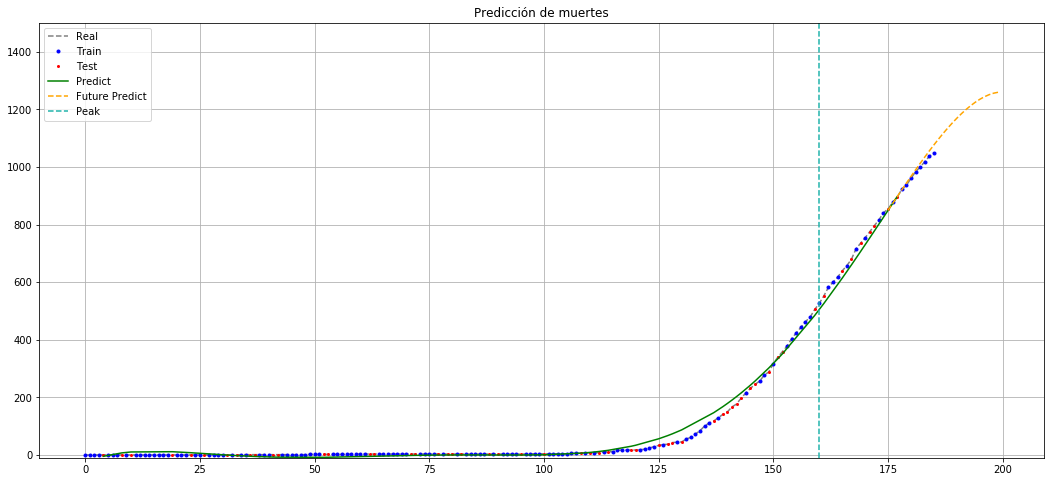

In [15]:
#Graph ordered data.
f = plt.figure(figsize=(18,8))
plt.title('Predicción de muertes')
plt.grid()
plt.plot(X,y,'--',color='gray',label='Real',)
plt.plot(X_train[X_train.flatten().argsort(),0],y_train[X_train.flatten().argsort(),0],'ob',markersize=3,label='Train')
plt.plot(X_test[X_test.flatten().argsort(),0],y_test[X_test.flatten().argsort(),0],'or',markersize=2,label='Test')
plt.plot(X_test[X_test.flatten().argsort(),0],y_pred[X_test.flatten().argsort()],'-g',label='Predict')
plt.plot(x_pred_future,y_pred_future,'--',color='orange',label='Future Predict')
plt.plot([160,160],[-10,1500],'--',color='lightseagreen', label='Peak') #Peak of cases.
plt.ylim(-10,1500)
plt.legend(loc='upper left');

In [16]:
#Calculate Metrics of trained model
x_val = X[160:]
y_val = y[160:]
y_pred_val = pipe.predict(x_val)
print('     ---- Métricas ----')
print('Total RMSE:\t\t{:.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Total MAE:\t\t{:.0f}'.format(mean_absolute_error(y_test,y_pred)))
print('After Peak RMSE:\t{:.0f}'.format(np.sqrt(mean_squared_error(y_val, y_pred_val))))
print('After Peak MAE:\t\t{:.0f}'.format(mean_absolute_error(y_val,y_pred_val)))

     ---- Métricas ----
Total RMSE:		16
Total MAE:		12
After Peak RMSE:	20
After Peak MAE:		18


### Infectados

In [17]:
#Split data.
X = dfMED['dias'].values.reshape(-1,1)
y = dfMED['acumulado_infectados'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)

pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=4),Lasso(random_state=123))
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=4, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=123, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [18]:
y_pred = pipe.predict(X_test)
x_pred_future = np.arange(175,200,step=1)
y_pred_future = pipe.predict(x_pred_future.reshape(-1,1))

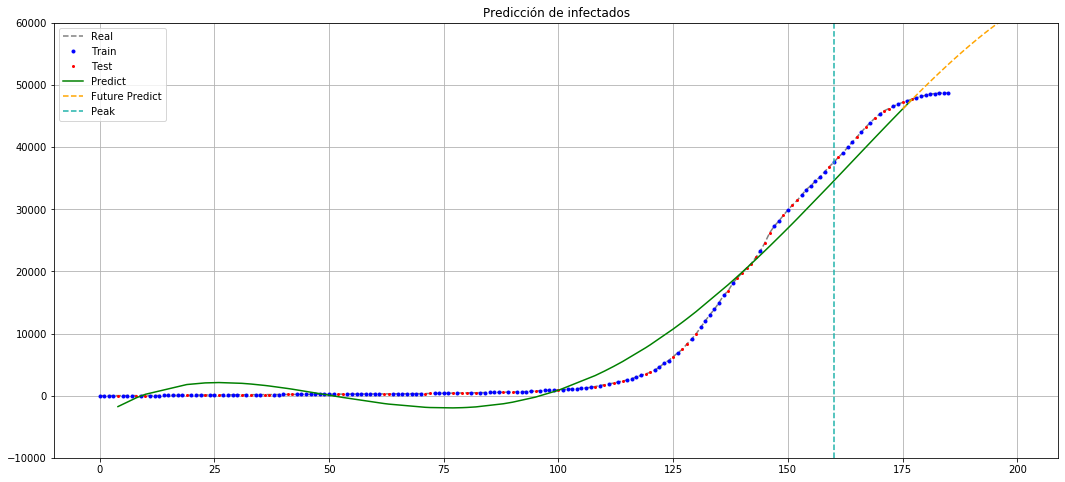

In [19]:
#Graph ordered data.
f = plt.figure(figsize=(18,8))
plt.title('Predicción de infectados')
plt.grid()
plt.plot(X,y,'--',color='gray',label='Real',)
plt.plot(X_train[X_train.flatten().argsort(),0],y_train[X_train.flatten().argsort(),0],'ob',markersize=3,label='Train')
plt.plot(X_test[X_test.flatten().argsort(),0],y_test[X_test.flatten().argsort(),0],'or',markersize=2,label='Test')
plt.plot(X_test[X_test.flatten().argsort(),0],y_pred[X_test.flatten().argsort()],'-g',label='Predict')
plt.plot(x_pred_future,y_pred_future,'--',color='orange',label='Future Predict')
plt.plot([160,160],[-10000,60000],'--',color='lightseagreen', label='Peak') #Peak of cases.
plt.ylim(-10000,60000)
plt.legend(loc='upper left');

In [20]:
#Calculate Metrics of trained model
x_val = X[160:]
y_val = y[160:]
y_pred_val = pipe.predict(x_val)
print('     ---- Métricas ----')
print('Total RMSE:\t\t{:.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Total MAE:\t\t{:.0f}'.format(mean_absolute_error(y_test,y_pred)))
print('After Peak RMSE:\t{:.0f}'.format(np.sqrt(mean_squared_error(y_val, y_pred_val))))
print('After Peak MAE:\t\t{:.0f}'.format(mean_absolute_error(y_val,y_pred_val)))

     ---- Métricas ----
Total RMSE:		2305
Total MAE:		1954
After Peak RMSE:	2694
After Peak MAE:		2454


## Modelo Medellín Mediano Plazo

In [22]:
urlDatasetMED_w = 'Datos/data_weekly_Medellin.pickle'
dfMED_w = pd.read_pickle(urlDatasetMED_w)
dfMED_w.tail(20)

,infectados,recuperados,muertos,acumulado_infectados,acumulado_recuperados,acumulado_muertos,activos
semana,,,,,,,
7,34.0,43.0,1.0,273.0,117.0,2.0,154.0
8,23.0,27.0,1.0,296.0,144.0,3.0,149.0
9,25.0,41.0,0.0,321.0,185.0,3.0,133.0
10,78.0,47.0,0.0,399.0,232.0,3.0,164.0
11,87.0,19.0,0.0,486.0,251.0,3.0,232.0
12,100.0,51.0,0.0,586.0,302.0,3.0,281.0
13,247.0,77.0,1.0,833.0,379.0,4.0,450.0
14,295.0,94.0,0.0,1128.0,473.0,4.0,651.0
15,748.0,94.0,3.0,1876.0,567.0,7.0,1302.0


### Activos

In [28]:
#Split data
X = dfMED_w.index.values.reshape(-1,1)
y = dfMED_w['activos'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)
#Train Model.
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=5),Lasso(max_iter=10000,random_state=123))
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=10000, normalize=False, positive=False,
                       precompute=False, random_state=123, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [29]:
#Run predictions based on test data.
y_pred = pipe.predict(X_test)
#Run predictions over future days data.
x_pred_future = np.arange(24,30,step=1)
y_pred_future = pipe.predict(x_pred_future.reshape(-1,1))

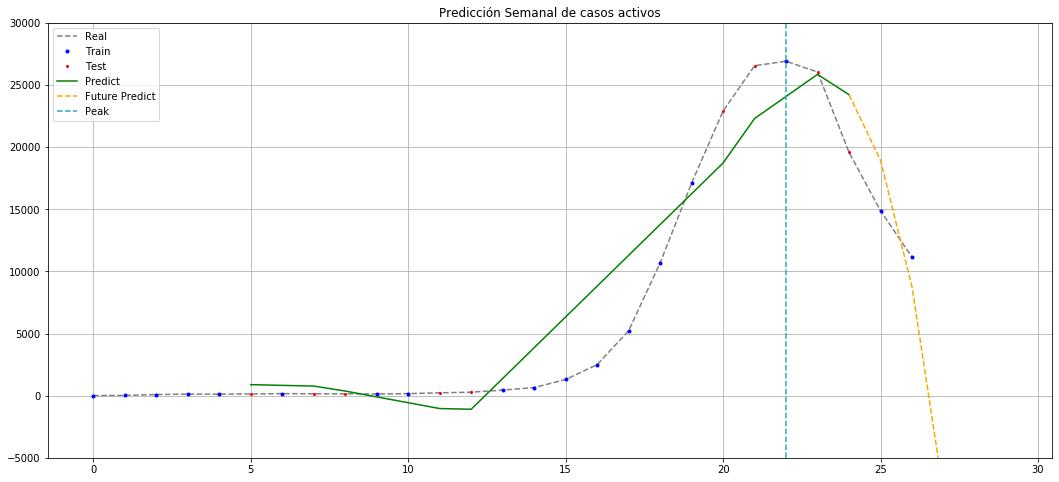

In [30]:
#Graph ordered data.
f = plt.figure(figsize=(18,8))
plt.title('Predicción Semanal de casos activos')
plt.grid()
plt.plot(X,y,'--',color='gray',label='Real',)
plt.plot(X_train[X_train.flatten().argsort(),0],y_train[X_train.flatten().argsort(),0],'ob',markersize=3,label='Train')
plt.plot(X_test[X_test.flatten().argsort(),0],y_test[X_test.flatten().argsort(),0],'or',markersize=2,label='Test')
plt.plot(X_test[X_test.flatten().argsort(),0],y_pred[X_test.flatten().argsort()],'-g',label='Predict')
plt.plot(x_pred_future,y_pred_future,'--',color='orange',label='Future Predict')
plt.plot([22,22],[-5000,30000],'--',color='lightseagreen', label='Peak') #Peak of cases.
plt.ylim(-5000,30000)
plt.legend(loc='upper left');

In [31]:
#Calculate Metrics of trained model
x_val = X[23:]
y_val = y[23:]
y_pred_val = pipe.predict(x_val)
print('     ---- Métricas ----')
print('Total RMSE:\t\t{:.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Total MAE:\t\t{:.0f}'.format(mean_absolute_error(y_test,y_pred)))
print('After Peak RMSE:\t{:.0f}'.format(np.sqrt(mean_squared_error(y_val, y_pred_val))))
print('After Peak MAE:\t\t{:.0f}'.format(mean_absolute_error(y_val,y_pred_val)))

     ---- Métricas ----
Total RMSE:		2616
Total MAE:		1943
After Peak RMSE:	3306
After Peak MAE:		2818


### Recuperados

In [32]:
#Split data
X = dfMED_w.index.values.reshape(-1,1)
y = dfMED_w['acumulado_recuperados'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)
#Train Model.
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=5),Lasso(random_state=123))
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=123, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [33]:
#Run predictions based on test data.
y_pred = pipe.predict(X_test)
#Run predictions over future days data.
x_pred_future = np.arange(24,30,step=1)
y_pred_future = pipe.predict(x_pred_future.reshape(-1,1))

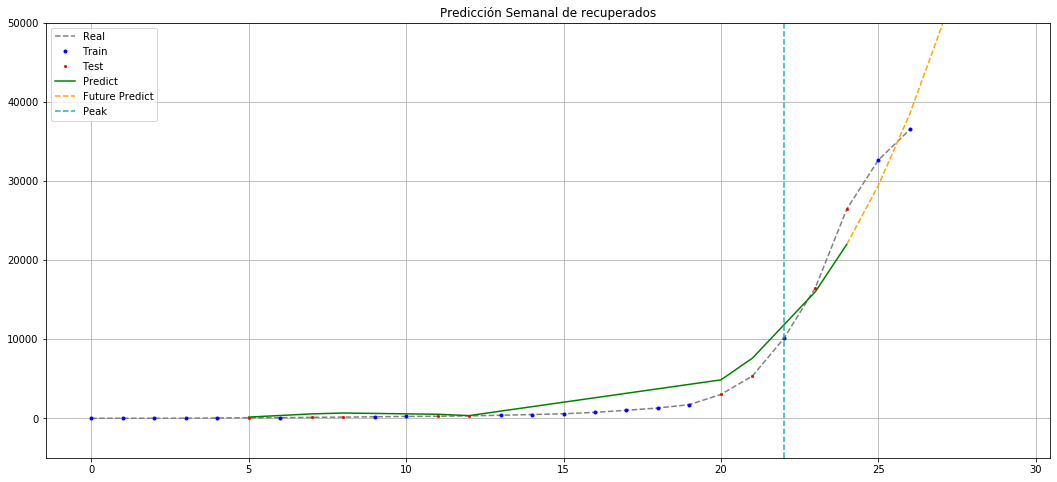

In [34]:
#Graph ordered data.
f = plt.figure(figsize=(18,8))
plt.title('Predicción Semanal de recuperados')
plt.grid()
plt.plot(X,y,'--',color='gray',label='Real',)
plt.plot(X_train[X_train.flatten().argsort(),0],y_train[X_train.flatten().argsort(),0],'ob',markersize=3,label='Train')
plt.plot(X_test[X_test.flatten().argsort(),0],y_test[X_test.flatten().argsort(),0],'or',markersize=2,label='Test')
plt.plot(X_test[X_test.flatten().argsort(),0],y_pred[X_test.flatten().argsort()],'-g',label='Predict')
plt.plot(x_pred_future,y_pred_future,'--',color='orange',label='Future Predict')
plt.plot([22,22],[-5000,50000],'--',color='lightseagreen', label='Peak') #Peak of cases.
plt.ylim(-5000,50000)
plt.legend(loc='upper left');

In [35]:
#Calculate Metrics of trained model
x_val = X[23:]
y_val = y[23:]
y_pred_val = pipe.predict(x_val)
print('     ---- Métricas ----')
print('Total RMSE:\t\t{:.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Total MAE:\t\t{:.0f}'.format(mean_absolute_error(y_test,y_pred)))
print('After Peak RMSE:\t{:.0f}'.format(np.sqrt(mean_squared_error(y_val, y_pred_val))))
print('After Peak MAE:\t\t{:.0f}'.format(mean_absolute_error(y_val,y_pred_val)))

     ---- Métricas ----
Total RMSE:		1803
Total MAE:		1157
After Peak RMSE:	2937
After Peak MAE:		2545


### Muertos

In [36]:
#Split data
X = dfMED_w.index.values.reshape(-1,1)
y = dfMED_w['acumulado_muertos'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=123,shuffle=True)
#Train Model.
pipe = make_pipeline(StandardScaler(),PolynomialFeatures(degree=5),Lasso(random_state=123))
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomialfeatures',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                       max_iter=1000, normalize=False, positive=False,
                       precompute=False, random_state=123, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [37]:
#Run predictions based on test data.
y_pred = pipe.predict(X_test)
#Run predictions over future days data.
x_pred_future = np.arange(24,30,step=1)
y_pred_future = pipe.predict(x_pred_future.reshape(-1,1))

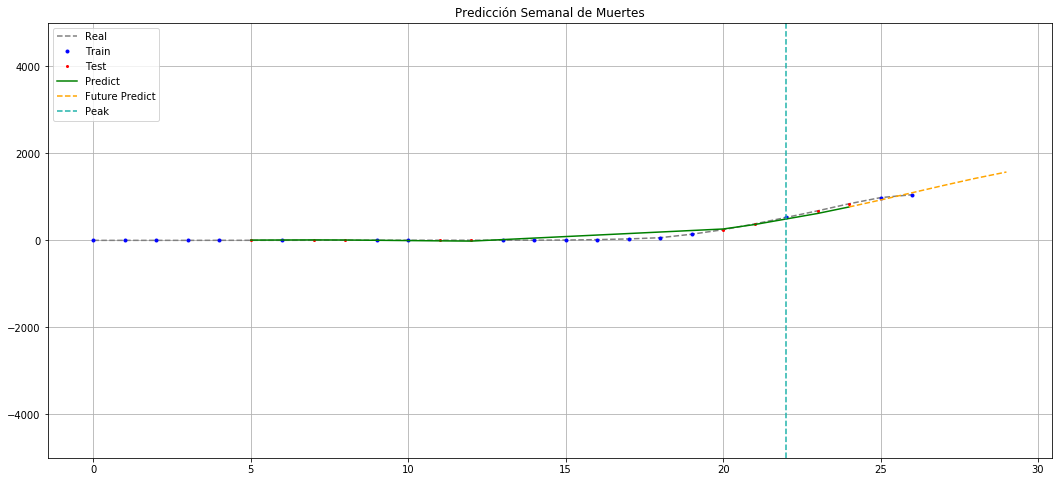

In [38]:
#Graph ordered data.
f = plt.figure(figsize=(18,8))
plt.title('Predicción Semanal de Muertes')
plt.grid()
plt.plot(X,y,'--',color='gray',label='Real',)
plt.plot(X_train[X_train.flatten().argsort(),0],y_train[X_train.flatten().argsort(),0],'ob',markersize=3,label='Train')
plt.plot(X_test[X_test.flatten().argsort(),0],y_test[X_test.flatten().argsort(),0],'or',markersize=2,label='Test')
plt.plot(X_test[X_test.flatten().argsort(),0],y_pred[X_test.flatten().argsort()],'-g',label='Predict')
plt.plot(x_pred_future,y_pred_future,'--',color='orange',label='Future Predict')
plt.plot([22,22],[-5000,5000],'--',color='lightseagreen', label='Peak') #Peak of cases.
plt.ylim(-5000,5000)
plt.legend(loc='upper left');

In [39]:
#Calculate Metrics of trained model
x_val = X[23:]
y_val = y[23:]
y_pred_val = pipe.predict(x_val)
print('     ---- Métricas ----')
print('Total RMSE:\t\t{:.0f}'.format(np.sqrt(mean_squared_error(y_test, y_pred))))
print('Total MAE:\t\t{:.0f}'.format(mean_absolute_error(y_test,y_pred)))
print('After Peak RMSE:\t{:.0f}'.format(np.sqrt(mean_squared_error(y_val, y_pred_val))))
print('After Peak MAE:\t\t{:.0f}'.format(mean_absolute_error(y_val,y_pred_val)))

     ---- Métricas ----
Total RMSE:		34
Total MAE:		24
After Peak RMSE:	59
After Peak MAE:		59
